In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
np.random.seed(1000)

In [5]:
X,y = make_blobs(n_samples=50)

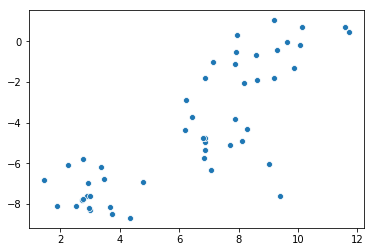

In [6]:
sns.scatterplot(X[:,0],X[:,1])

# Clustering

In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering

> K Means

In [8]:
model_k = KMeans(n_clusters=3)

In [9]:
model_k.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
# Calculate WCSS
model_k.inertia_

102.55853448017838

In [11]:
center = model_k.cluster_centers_

In [19]:
center

array([[ 9.05107701, -0.56335117],
       [ 3.02845642, -7.46326475],
       [ 7.37397032, -4.97171392]])

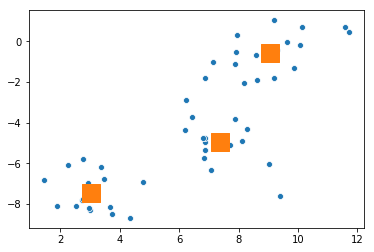

In [12]:
sns.scatterplot(X[:,0],X[:,1])
plt.scatter(center[:,0],center[:,1],s=300,marker='s')

> WCSS

In [20]:
wcss = []
for i in range(X.shape[0]):
    model_k = KMeans(n_clusters=i+1)
    model_k.fit(X)
    wcss.append(model_k.inertia_)

Text(0,0.5,'Equdilean Distance')

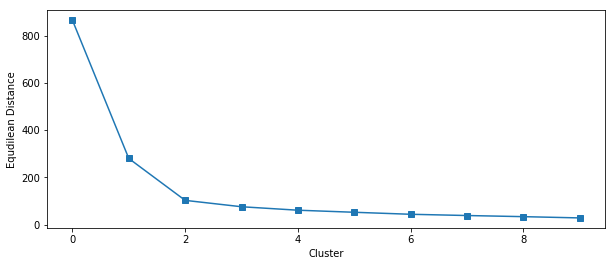

In [14]:
plt.figure(figsize=(10,4))
plt.plot(wcss[:10],marker='s')
plt.xlabel('Cluster')
plt.ylabel('Equdilean Distance')

since from Elbow method we found number of cluster = 3

In [15]:
model_k_final = KMeans(n_clusters=3)
model_k_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
y_pred = model_k_final.predict(X)
print(y_pred)

[2 0 0 0 1 2 2 1 1 1 2 2 1 1 1 0 2 2 0 1 2 0 0 0 1 1 0 2 1 0 0 1 1 1 2 1 2
 1 0 2 0 1 1 2 2 0 0 2 0 0]


In [17]:
center = model_k_final.cluster_centers_

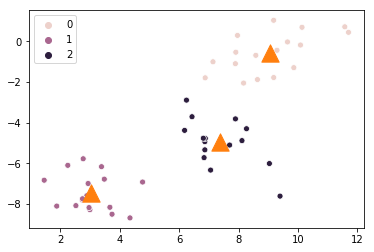

In [18]:
sns.scatterplot(X[:,0],X[:,1],hue= y_pred)
plt.scatter(center[:,0],center[:,1],s=300,marker='^')